# Classes and data generation

Classes can be manipulated in very different ways. This is very useful when handling data from different source with different properties.

Here an example on how to generate data in classes, and work on the data directly via their classes. 

### Exercise: make a 2D random data plot and one with noise around a function

In [153]:
!ls

data_for_cluster.py		   mse.py	     mse_vanilla.py
Data_generation_and_classes.ipynb  mse_scaling_2.py  __pycache__
linear_data.py			   mse_scaling_3.py  test.py
mse_numpy.py			   mse_scaling.py


### My solution

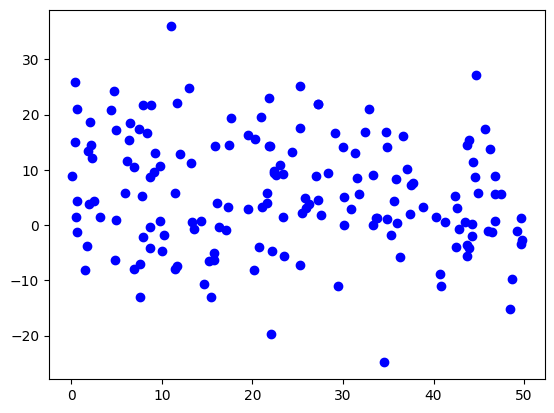

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(n_random_points, noise=16):
    x = np.random.rand(n_random_points) * 50 

    # Make 'perfect' data
    true_slope,  true_intercept = 0, 5
    y = true_slope * x + true_intercept
    
    # Add noise
    y += np.random.randn(n_random_points)*noise 
    
    return x, y, true_slope, true_intercept

# Use the function to generate data
x, y, true_slope, true_intercept = generate_linear_data(
        n_random_points=166, noise=10)

# Plot all
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()


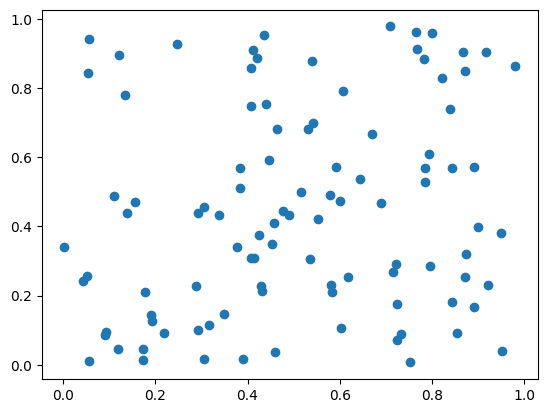

In [137]:
def generate_2d_data(n_random_points, noise=16):
    # Generate some sample data
    data = np.random.rand(100, 2)  # 100 data points with 2 features
    return data[:, 0], data[:, 1]


x, y = generate_2d_data(n_random_points=100, noise= 123)

plt.scatter(x, y)
plt.show()


### Exercise: Let's be more pythonic now, keep the data and the functions inside a class

### My solution

In [138]:


def generate_2d_data(n_random_points, noise=16):
    # Generate some sample data
    data = np.random.rand(100, 2)  # 100 data points with 2 features
    return  data[:, 0], data[:, 1]



class Data_generator():
    def __init__(self, description='Data generator', dimensions=2, n_points=100, noise=16):
        self.description = description
        self.dimensions = dimensions
        self.n_poiunts = n_points
        self.noise = noise
        self.data = None
    
    def generate_data(self):
        if self.dimensions == 2:
            self.data = generate_2d_data(self.n_poiunts, self.noise)
            
    def __add__(self, data_class):
        return np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])

    def __str__(self):
        return f'Class {self.description} for {self.dimensions}D data' 

        

In [139]:
myclass = Data_generator()
myclass2 = Data_generator() 

myclass.generate_data()
myclass2.generate_data()
print(myclass)

Class Data generator for 2D data


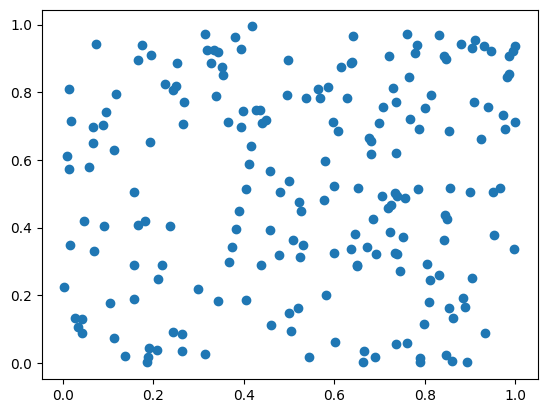

In [140]:
# Summing classes
x, y = myclass + myclass2

plt.scatter(x, y)
plt.show()


### Exercise
add a function to the class such to generate linear data and sum then a class with random data. Plot the output
